
## Advanced Methods in Data Analysis
## Grupo 8

## Exercise 03 - Autoregressive Integrated Moving Average Models

Laura Gutierrez Código 201015209

Fernando Bautista Código 202027865

Fredi Baron Código 202027522

Ingrid Hernández Código 202028041

### 1 - Plot and analyze the ACF and PACF of the 4 time series in data_arma.csv:

What do these plots suggest about the data being an AR or MA process?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/HOGAR/Documents/LFBM/Modelos_avanzados_Analisis/Ejercicios/E3/data_arma.csv')
df.head()

,Unnamed: 0,ts1,ts2,ts3,ts4
0,0,0.533570,-0.126804,-0.802837,1.812825
1,1,1.240130,1.314360,-0.595602,0.042764
2,2,1.618598,1.405994,0.127180,-1.759427
3,3,1.140465,3.132621,0.958586,-0.456798
4,4,0.481561,3.179083,0.164598,-1.254790


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts1     500 non-null    float64
 1   ts2     500 non-null    float64
 2   ts3     500 non-null    float64
 3   ts4     500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


<AxesSubplot:>

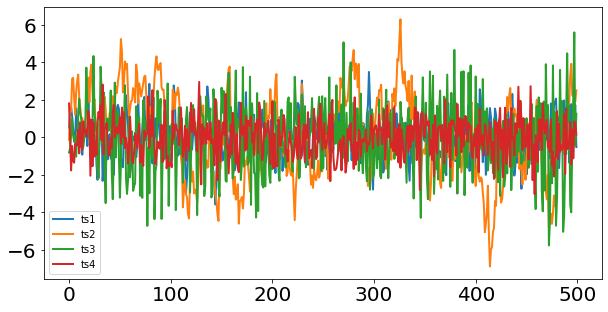

In [5]:
df.plot(figsize=(10,5), linewidth=2, fontsize=20)

### Serie 1

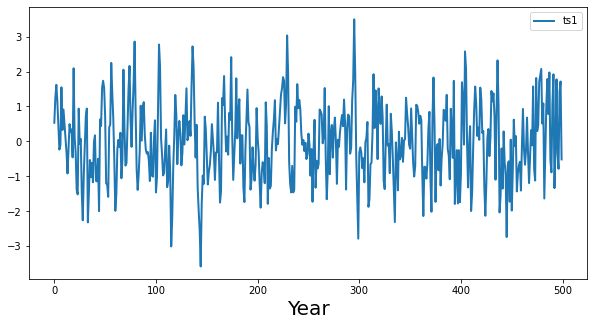

In [6]:
df[['ts1']].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=20);

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
result = adfuller(df['ts1'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.634560
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


Se puede observar en la gráfica  y en la prueba Dickey Fuller que la serie de tiempo es estacionaria dado que se rechaza la hipótesis nula

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

#### ACF

El ACF explica cómo el valor actual de una serie temporal determinada está correlacionado con los valores pasados

Las gráficas del ACF y el PACF para una serie temporal estacionaria.

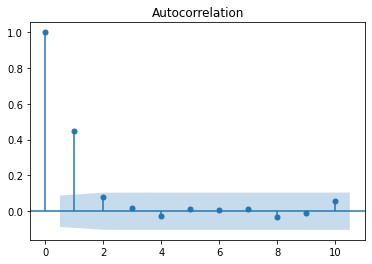

In [10]:
plot_acf(df['ts1'], lags=10);

El ACF muestra una tendencia gradualmente decreciente 

#### Partial Autocorrelation Function

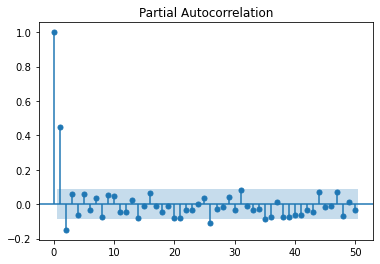

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['ts1'], lags=50);

el PACF se corta inmediatamente después de un retardo. Por lo tanto, los gráficos sugieren que un modelo ARMA (1,1) sería apropiado para la serie temporal.

### Serie 2

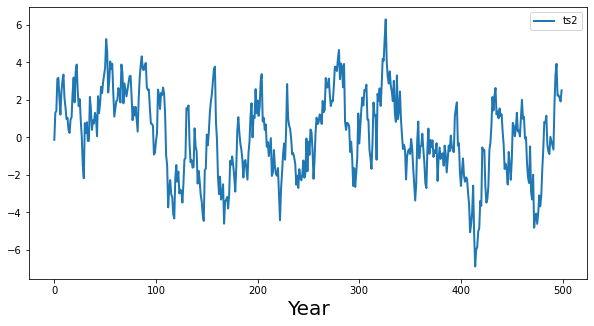

In [12]:
df[['ts2']].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=20);

In [13]:
result = adfuller(df['ts2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.345985
p-value: 0.000004
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


Se puede observar en la gráfica y en la prueba Dickey Fuller que la serie de tiempo es estacionaria dado que se rechaza la hipótesis nula

#### ACF

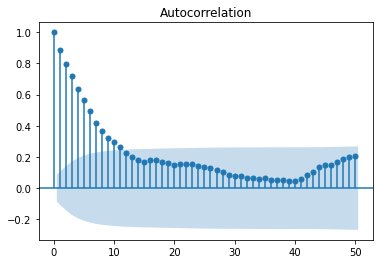

In [14]:
plot_acf(df['ts2'], lags=50);

#### Partial Autocorrelation Function

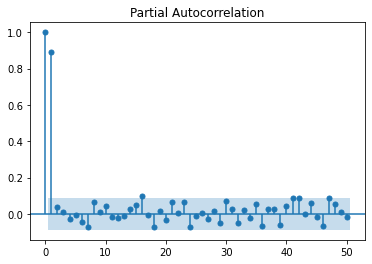

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['ts2'], lags=50);

el PACF se corta inmediatamente después de un retardo. Por lo tanto, los gráficos sugieren que un modelo AR (1) sería apropiado para la serie temporal.

### Serie 3

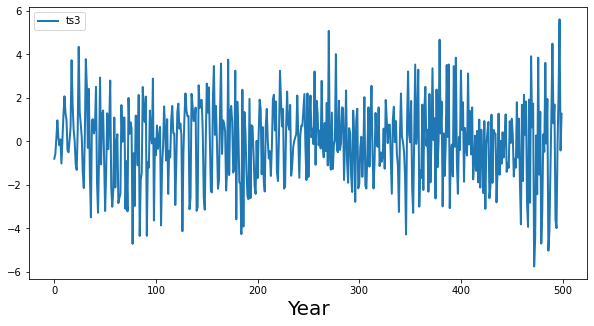

In [16]:
df[['ts3']].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=20);

In [17]:
result = adfuller(df['ts3'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.708845
p-value: 0.003990
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


Se puede observar en la gráfica y en la prueba Dickey Fuller que la serie de tiempo es estacionaria dado que se rechaza la hipótesis nula

#### ACF

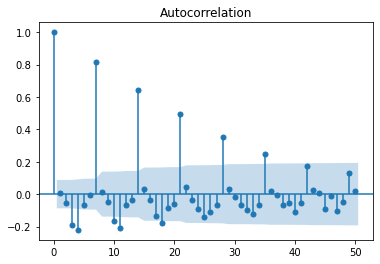

In [18]:
plot_acf(df['ts3'], lags=50);

el PAC se corta inmediatamente después de un retardo. Por lo tanto, los gráficos sugieren que un modelo MA(q) sería apropiado para la serie temporal.

#### Partial Autocorrelation Function

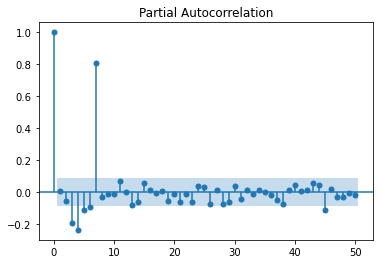

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['ts3'], lags=50);

### Serie 4

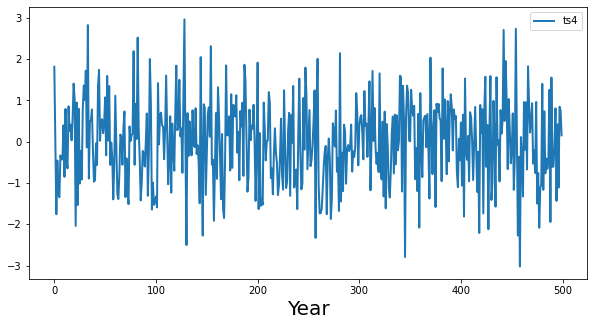

In [20]:
df[['ts4']].plot(figsize=(10,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=20);

In [21]:
result = adfuller(df['ts4'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.943060
p-value: 0.000000
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


Se puede observar en la gráfica y en la prueba Dickey Fuller que la serie de tiempo es estacionaria dado que se rechaza la hipótesis nula

#### ACF

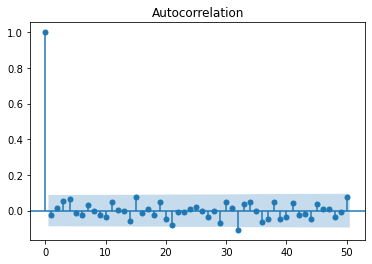

In [22]:
plot_acf(df['ts4'], lags=50);

#### Partial Autocorrelation Function

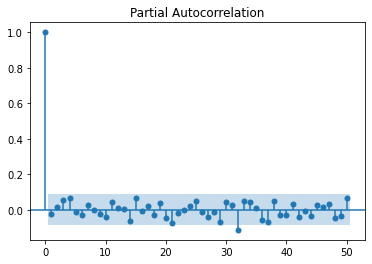

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['ts4'], lags=50);

La figura muestra los residuales del modelo y las respectivas autocorrelaciones para la serie.

### 2 - Using the shampoo dataset:

Find the parameters p, d q that minimize the mean squared error (MSE) of the rolling forecast.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [25]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('C:/Users/HOGAR/Documents/LFBM/Modelos_avanzados_Analisis/Ejercicios/E3/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


<ipython-input-25-91196c275e06>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


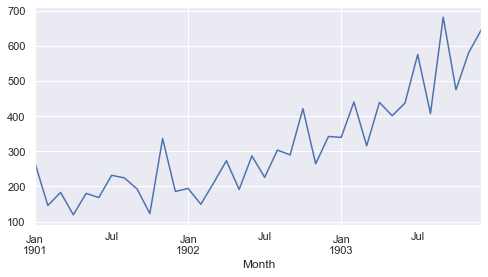

In [26]:
series.plot(figsize=(8, 4));

Se evidencia que la serie presenta tendencia por lo tanto se realiza la prueba de Dickey Fuller, para evidenciar si presenta estacionaridad.

In [27]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060142
p-value: 1.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


No se rechaza la hipotesis nula por lo tanto la serie no es estacionaria, se realiza diferencia.

<AxesSubplot:xlabel='Month'>

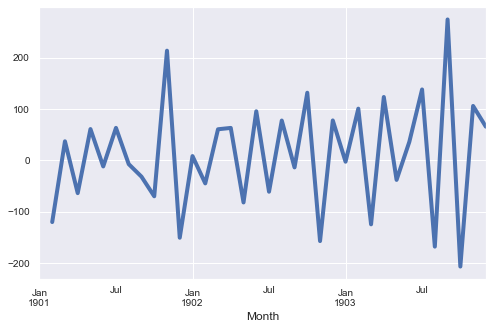

In [28]:
series.diff().plot(figsize=(8,5), linewidth=4, fontsize=10)

In [29]:
result = adfuller(series.diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.249074
p-value: 0.000000
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


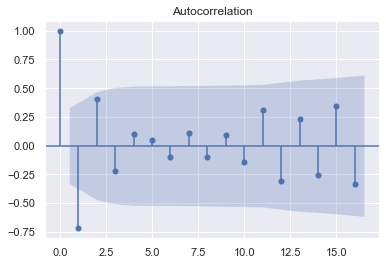

In [30]:
plot_acf(series.diff().iloc[1:]);

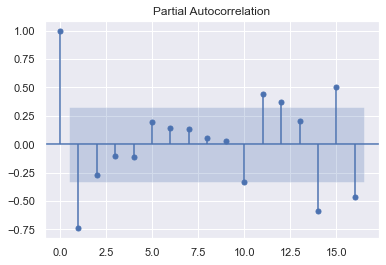

In [31]:
plot_pacf(series.diff().iloc[1:]);

In [32]:
from statsmodels.tsa.arima_model import ARIMA

#### ARIMA(p=1,d=1,q=1)

In [33]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Sun, 11 Jul 2021   AIC                            402.467
Time:                        20:39:22   BIC                            408.688
Sample:                    02-01-1901   HQIC                           404.614
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.001       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.000      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [34]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(1,1,1))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [35]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 25780.666


#### ARIMA(p=1,d=1,q=0)

In [36]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [37]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 19188.739


#### ARIMA(p=1,d=1,q=1)

In [38]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(2,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [39]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 17833.595


#### ARIMA(p=3,d=1,q=1)

In [40]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(3,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [41]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 16994.752


#### ARIMA(p=0,d=1,q=1)

In [42]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(0,1,1))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [43]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 26907.723


#### ARIMA(p=0,d=1,q=2)

In [44]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(0,1,2))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [45]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 25801.231


#### ARIMA(p=0,d=1,q=3)

In [46]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(0,1,3))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [47]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 25629.022


#### ARIMA(p=2,d=1,q=2)

In [48]:
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(2,1,2))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

error = mean_squared_error(test, predictions)
print(error)

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


26512.946403732025


C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


#### ARIMA(p=3,d=2,q=0)

In [49]:
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(3,2,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

error = mean_squared_error(test, predictions)
error

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


9831.085849534458

#### ARIMA(p=6,d=2,q=0)

In [50]:
##for i in range(10):
model = ARIMA(history, order=(6,2,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future
error = mean_squared_error(test, predictions)
error

C:\Users\HOGAR\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


5370.314275777006

### Validacion modelo

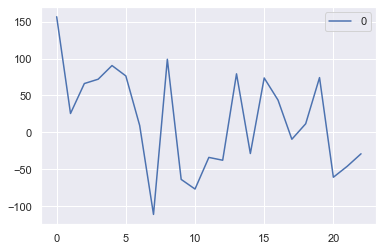

In [51]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

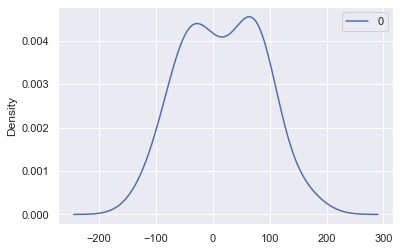

                0
count   23.000000
mean    16.568542
std     68.735509
min   -111.067554
25%    -35.801715
50%     11.671638
75%     73.907813
max    156.534867


In [52]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

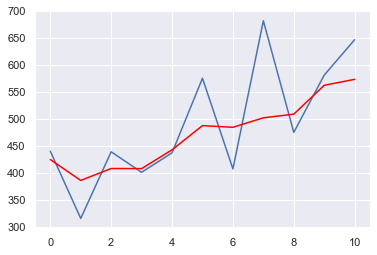

In [53]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Se selecciona modelo con $p=6$, $d=2$ y $q=0$, presenta el menor siendo este $MSE= 5370.314$, en la gráfica podemos evidenciar estima la tendencia, pero no la fluctuaciones.